# San Silvestre 2021

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f


'%.2f'

In [3]:
data = pd.read_pickle("./asset/data.pkl")
data["TiempoMinutos"] = data.Tiempo.apply(lambda x: pd.Timedelta(x).total_seconds() / 60)
data.head()

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",TiempoMinutos
0,36417,David Bascuñana Corrales,M-35,1,1,0:29:13,"2'55""/km",0:07:09,0:14:17,0:21:03,29.22
1,27702,Jaouad El Bissis El Bissis,M-35,2,2,0:29:18,"2'55""/km",0:07:09,0:14:17,0:21:09,29.30
2,29141,Luis Agustín Escriche,Sénior M,3,1,0:30:30,"3'03""/km",0:07:23,0:14:37,0:21:46,30.50
3,22312,Javier Martinez Fernández,M-35,4,3,0:30:48,"3'04""/km",0:07:24,0:14:54,0:22:07,30.80
4,10217,Sergio Salinero Miguel,M-35,5,4,0:30:59,"3'05""/km",0:07:25,0:14:54,0:22:10,30.98


In [4]:
mine = data.query("Nombre=='Maximiliano Greco'")
mine

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",TiempoMinutos
0,31471,Maximiliano Greco,Sénior M,5746,1449,0:52:56,"5'17""/km",0:12:34,0:24:45,0:37:06,52.93


# Estadísticas

Cuánto tardé en completar la carrera? 

In [16]:
mine.TiempoMinutos.item()

52.93

De media, Cuánto tardaron los corredores en completar la carrera ? 

In [20]:
float(data.TiempoMinutos.mean())

58.15

En qué percetil está mi tiempo ?

In [21]:
stats.percentileofscore(data.TiempoMinutos, mine.TiempoMinutos.item())

35.03

Cuánto tardó el corredor mediano ?

In [22]:
data.TiempoMinutos.median()

56.85

Cuánto tardó el corredor que tardó menos que el 80% ? 

In [23]:
data.TiempoMinutos.quantile(0.2)

48.75

# Plot

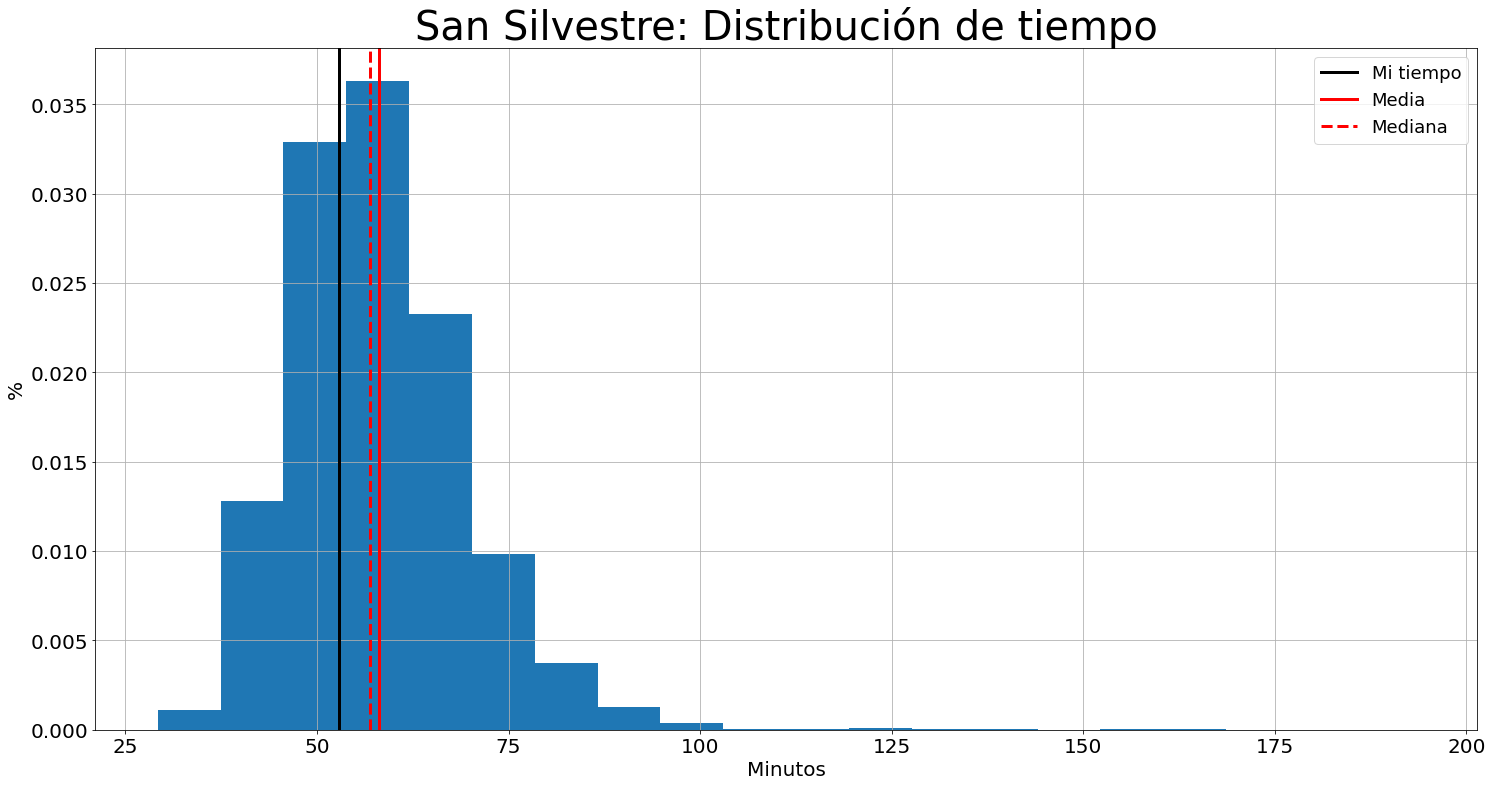

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

data.TiempoMinutos.hist(bins=20, density=True, figsize=(20,10))
plt.axvline(mine.TiempoMinutos.item(), color="black", linewidth=3, label="Mi tiempo")
plt.axvline(data.TiempoMinutos.mean(), color="red", linewidth=3, label="Media")
plt.axvline(data.TiempoMinutos.median(), color="red", linestyle="--", linewidth=3, label="Mediana")
plt.tight_layout()
plt.title("San Silvestre: Distribución de tiempo", fontsize=40)
plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Minutos", fontsize=20)
plt.ylabel("%", fontsize=20)
plt.show()
